In [1]:
# 首先，我们需要加载并查看上传的文件内容，以了解数据的结构。
import pandas as pd

# 加载数据
data_path = './data/train.csv'
data = pd.read_csv(data_path)

# 显示数据的前几行以及信息概览
data.info(), data.head()

/tmp/ipykernel_2163/4249202280.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


(None,
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
 0           0.288585          -0.020294          -0.132905         -0.995279   
 1           0.278419          -0.016411          -0.123520         -0.998245   
 2           0.279653          -0.019467          -0.113462         -0.995380   
 3           0.279174          -0.026201          -0.123283         -0.996091   
 4           0.276629          -0.016570          -0.115362         -0.998139   
 
    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
 0         -0.983111         -0.913526         -0.995112         -0.983185   
 1         -0.975300         -0.960322         -0.998807         -0.974914   
 2         -0.967187         -0.978944         -0.996520         -0.963668   
 3         -0.983403         -0.990675         -0.997099         -0.982750   
 4         -0.980817         -0.990482         -0.998321         -0.979672   
 
    tBodyAcc-mad()-Z  tBodyAcc-max(

In [2]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 数据准备
X = data.iloc[:, :-2].values  # 假设最后两列是subject和Activity，所以我们不包括它们
y = data['Activity'].values

# 将标签编码为整数
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 将数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 由于LSTM需要的输入格式为[样本数, 时间步长, 特征数]，这里不需要重新塑形，因为我们已经有了正确的格式
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(100, activation='relu'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

# 编译模型
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 评估模型
accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'测试集准确率: {accuracy[1]:.2f}')

2024-03-13 23:59:04.488633: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 23:59:05.660108: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 23:59:08.549679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 23:59:11.610387: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 43s 220ms/step - accuracy: 0.2718 - loss: 1.6163 - val_accuracy: 0.2271 - val_loss: 1.7252
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - accuracy: 0.3160 - loss: 1.5294 - val_accuracy: 0.3800 - val_loss: 1.1943
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.4226 - loss: 1.1100 - val_accuracy: 0.4181 - val_loss: 1.0786
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.4444 - loss: 1.0665 - val_accuracy: 0.5044 - val_loss: 1.0416
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 222ms/step - accuracy: 0.4858 - loss: 1.0279 - val_accuracy: 0.5194 - val_loss: 0.9895
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.5039 - loss: 0.9935 - val_accuracy: 0.5330 - val_loss: 0.9531
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 40s 219ms/step - accuracy: 0.5088 - loss: 0.9722 - val_accuracy: 0.5133 - val_loss: 0.9631
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 40s 220ms/step - accuracy: 0.4959 - loss: 0.9834 - val

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# 使用模型进行预测
y_pred = model.predict(X_test)
# 将预测的概率转换为类别标签
y_pred_classes = np.argmax(y_pred, axis=1)

# 生成和打印分类报告
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step
                    precision    recall  f1-score   support

            LAYING       0.56      0.52      0.54       280
           SITTING       0.40      0.85      0.54       262
          STANDING       0.33      0.00      0.01       276
           WALKING       0.76      0.67      0.71       247
WALKING_DOWNSTAIRS       0.86      0.64      0.74       206
  WALKING_UPSTAIRS       0.49      0.69      0.57       200

          accuracy                           0.55      1471
         macro avg       0.57      0.56      0.52      1471
      weighted avg       0.56      0.55      0.50      1471

[[145 129   0   0   0   6]
 [ 37 223   0   0   0   2]
 [ 70 203   1   0   0   2]
 [  1   0   0 166   7  73]
 [  1   0   0  13 132  60]
 [  4   2   2  40  14 138]]


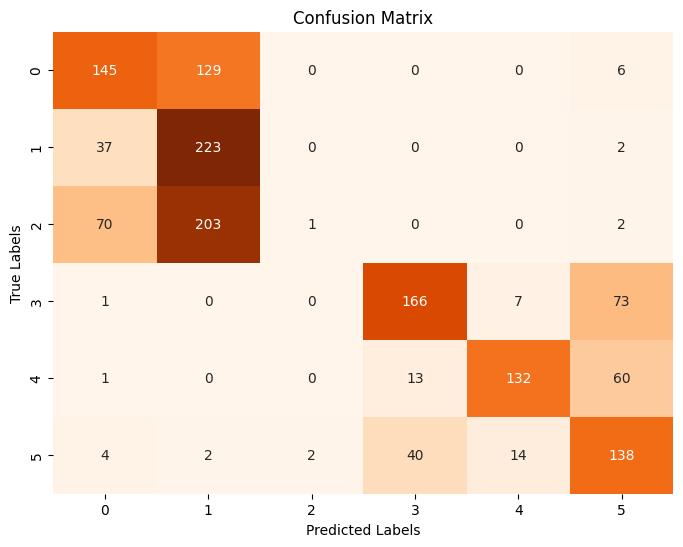

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()